# Classifying Movie Reviews: A Binary Classification

## Imports

In [14]:
from keras.datasets import imdb
from keras import models, layers, losses, metrics

import matplotlib.pyplot as plt

import numpy as np

## Loading Dataset

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


print(f'data: {train_data[0:5]}')
print(f'labels: {train_labels[0:5]}')

data: [list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 

Data is set of lists of dictionary indices of words used in a given review

Labels are 1s and 0s of positive and negative reviews respectively

## Preparing the Data

In [4]:
# manually encoding
def vectorize_sequences(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

# vectorize sequences
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Defining the Model

In [8]:
# naming the model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
# compiling the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

if you would want to use a custom loss or activation function, you would do the following
from keras import optmizers/losses/metrics

for loss:
- loss = losses.binary_crossentropy (custom loss function)

for optimzers:
- optimizer = optimzers.RMSprop(lr=0.001) (custom function)

for metrics:
- metrics = [metrics.binary_acccuracy]


## Training the Model

In [12]:
# creating the validation data set
## can use sklearn but i cba rn
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
# fitting the validation data
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 9s 252ms/step - loss: 0.5401 - accuracy: 0.7679 - val_loss: 0.4046 - val_accuracy: 0.8661
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3332 - accuracy: 0.8937 - val_loss: 0.3208 - val_accuracy: 0.8805
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2504 - accuracy: 0.9171 - val_loss: 0.2891 - val_accuracy: 0.8872
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2049 - accuracy: 0.9311 - val_loss: 0.2768 - val_accuracy: 0.8894
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1699 - accuracy: 0.9451 - val_loss: 0.2761 - val_accuracy: 0.8867
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1458 - accuracy: 0.9529 - val_loss: 0.2804 - val_accuracy: 0.8881
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1257 - accuracy: 0.9620 - val_loss: 0.2890 - val_accuracy: 0.8869
Epoch 8/20
3

## Visualizing Training and Validation Loss/Accuracy

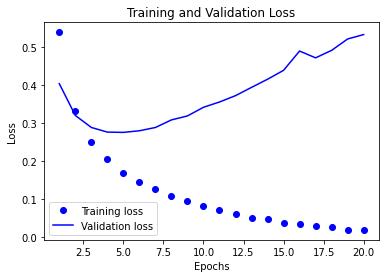

In [16]:
# plotting loss

# getting values
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 20+1)

# setting up and displaying plot
plt.figure(facecolor='White') # set the facecolor to white
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

A classic case of overfitting

In [18]:
"""# plotting accuracy
plt.clf()
# getting variables
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, 20+1)

# setting up and displaying plot
plt.figure(facecolor='White') # set the facecolor to white
plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()"""

"# plotting accuracy\nplt.clf()\n# getting variables\nacc_values = history_dict['acc']\nval_acc_values = history_dict['val_acc']\n\nepochs = range(1, 20+1)\n\n# setting up and displaying plot\nplt.figure(facecolor='White') # set the facecolor to white\nplt.plot(epochs, acc_values, 'bo', label='Training Accuracy')\nplt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')\nplt.title('Training and Validation Accuracy')\nplt.xlabel('Epochs')\nplt.ylabel('Loss')\nplt.legend()\n\nplt.show()"